## Job Placement Prediction using Machine Learning

Importing the necessary libraries for dataframe creation and manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing the dataset into the Jupyter Notebook environment

In [314]:
df = pd.read_csv("Job_Placement_Data.csv")
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


Understanding the feature variables of the dataset

This file contains different attribute of the candidates educational history and work experience. The detailed data dictionary is given below:

### Data Dictionary:

gender : Gender of the candidate

ssc_percentage : Senior secondary exams percentage (10th Grade)

ssc_board : Board of education for ssc exams

hsc_percentage : Higher secondary exams percentage (12th Grade)

hsc_borad : Board of education for hsc exams

hsc_subject : Subject of study for hsc

degree_percentage : Percentage of marks in undergrad degree

undergrad_degree : Undergrad degree majors

work_experience : Past work experience

emp_test_percentage : Aptitude test percentage

specialization : Postgrad degree majors - (MBA specialization)

mba_percent : Percentage of marks in MBA degree

status (TARGET) : Status of placement. Placed / Not Placed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


<AxesSubplot:>

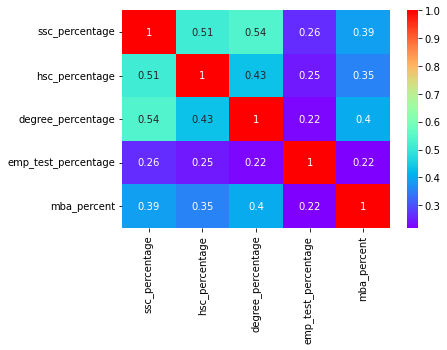

In [7]:
sns.heatmap(df.corr() , cmap = 'rainbow' ,annot = True)

The above heatmap shows the correlation matrix of the above dataset.
From the matrix we can see that none of the feature variables are not highly correlated with each other.

In [8]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [14]:
cat_feat = df.select_dtypes(include='object').columns

### Understanding the variation of the categorical data values in the dataset

C:\Users\megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


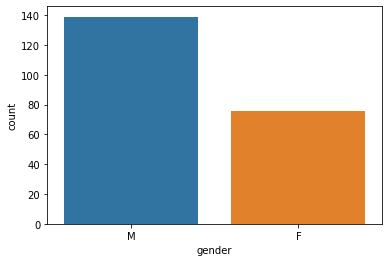

C:\Users\megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


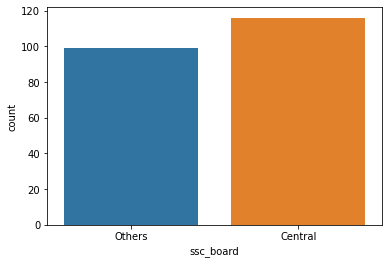

C:\Users\megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


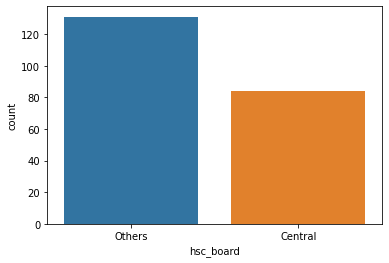

C:\Users\megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


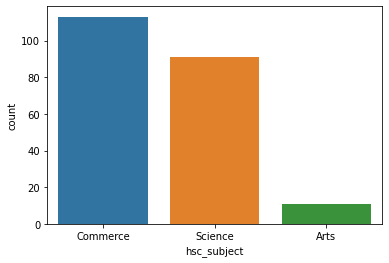

C:\Users\megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


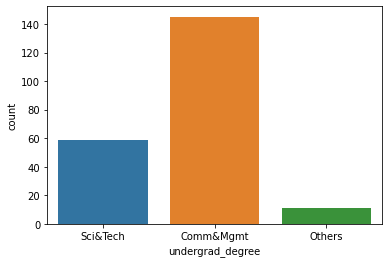

C:\Users\megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


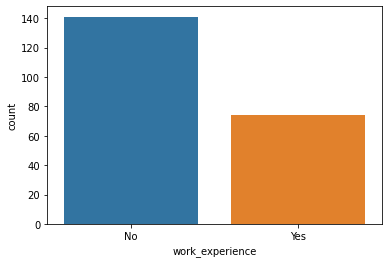

C:\Users\megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


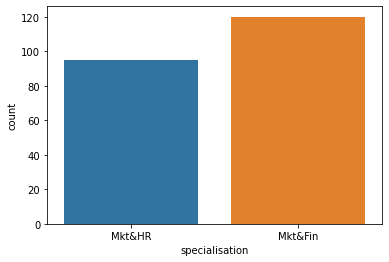

C:\Users\megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


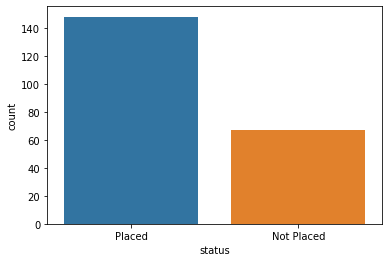

In [20]:
for i in cat_feat:
    sns.countplot(df[i])
    plt.show()

In [24]:
for i in cat_feat:
    print(df[i].value_counts())

M    139
F     76
Name: gender, dtype: int64
Central    116
Others      99
Name: ssc_board, dtype: int64
Others     131
Central     84
Name: hsc_board, dtype: int64
Commerce    113
Science      91
Arts         11
Name: hsc_subject, dtype: int64
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: undergrad_degree, dtype: int64
No     141
Yes     74
Name: work_experience, dtype: int64
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
Placed        148
Not Placed     67
Name: status, dtype: int64


## Preparing the dataset for Training
### One- hot encoding / Label Encoding

In [334]:
df.gender.replace({"M":1,"F":0},inplace=True)

In [335]:
df.ssc_board.replace({"Central":1,"Others":0} , inplace=True)

In [347]:

df.hsc_board.replace({"Central":1,"Others":0}  , inplace=True) 

In [337]:
df.hsc_subject.replace({"Commerce":1,"Science":2,"Arts":0} ,inplace=True) 

In [338]:
df.undergrad_degree.replace({"Comm&Mgmt":1,"Sci&Tech":2,"Others":0} , inplace =True)  

In [339]:
df.work_experience.replace({"No" :0 , "Yes":1} , inplace=True) 

In [340]:
df.specialisation.replace({"Mkt&Fin":1,"Mkt&HR":2} ,inplace=True)

In [341]:
df.status.replace({"Placed":1 , "Not Placed":0} , inplace = True)

## Creating the Training and Testing Dataset

In [112]:
from sklearn.model_selection import train_test_split

<AxesSubplot:>

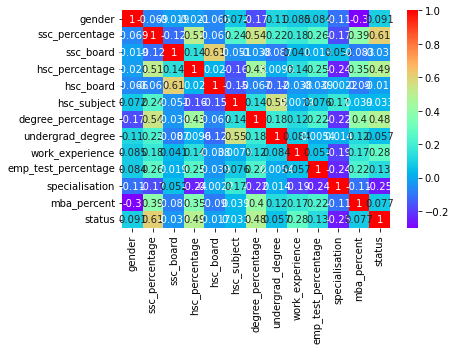

In [231]:
sns.heatmap(df.corr(), cmap  = 'rainbow',annot =True)


In [355]:
X = df.drop(columns = ["gender","status"])
Y = df.iloc[:,-1]

In [356]:
xtrain , xtest , ytrain , ytest = train_test_split(X,Y, test_size = 0.2 , random_state = 5 ,stratify = Y)

In [357]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(172, 11) (43, 11) (172,) (43,)


In [358]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 100)

In [359]:
model.fit(xtrain,ytrain)

C:\Users\megha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [360]:
p =model.predict(xtrain)

In [361]:
model.score(xtest,ytest)

0.9302325581395349

## Checking using Random values

In [232]:
import pickle

In [233]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [281]:
def conv(a):
    df = pd.DataFrame(a , columns = ['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board','hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent'])
    df.gender.replace({"M":1,"F":0},inplace=True)
    df.ssc_board.replace({"Central":1,"Others":0} , inplace=True)
    df.hsc_board.replace({"Central":1,"Others":0}  , inplace=True) 
    df.hsc_subject.replace({"Commerce":1,"Science":2,"Arts":0} ,inplace=True) 
    df.undergrad_degree.replace({"Comm&Mgmt":1,"Sci&Tech":2,"Others":0} , inplace =True)  
    df.work_experience.replace({"No" :0 , "Yes":1} , inplace=True) 
    df.specialisation.replace({"Mkt&Fin":1,"Mkt&HR":2} ,inplace=True)
    df.drop(columns ='gender' , inplace=True)
    df = np.array(df)
    return df

In [318]:
a = [['M',56.0,'Central',52.0,'Central','Science',52.00,'Sci&Tech','No',66.00,'Mkt&HR',59.43]]

In [319]:
x = conv(a)

In [320]:
x

array([[56.  ,  1.  , 52.  ,  1.  ,  2.  , 52.  ,  2.  ,  0.  , 66.  ,
         2.  , 59.43]])

In [321]:
model.predict(x)

array([0], dtype=int64)

In [317]:
df[df.status == "Not Placed"]

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed
201,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed
206,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed
208,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed


# Pickleing the Model

In [322]:
import pickle

In [324]:
pickle.dump(model,open('regmodel2.pkl','wb'))

In [325]:
pickle.dump(conv,open('Manipulation.pkl','wb'))

In [326]:
pickled_model = pickle.load(open('regmodel2.pkl','rb'))
manipulation = pickle.load(open('Manipulation.pkl','rb'))

In [327]:
x = manipulation(a)

In [328]:
pickled_model.predict(x)

array([0], dtype=int64)